# Recommender System


In [143]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import matplotlib
import re
import itertools
import plotly.graph_objs as go
import seaborn as sns  
import papermill as pm

In [101]:
movieData = pd.read_csv('movies_metadata.csv', low_memory=False)
patternDel = "([12]\d{3}-(0[1-9]|1[0-2])-(0[1-9]|[12]\d|3[01]))"
filter = movieData['id'].str.contains(patternDel)
movieData = movieData[~filter]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning:

This pattern has match groups. To actually get the groups, use str.extract.



In [102]:
movieData.overview = movieData.overview.apply(str)
movieData.spoken_languages = movieData.spoken_languages.apply(str)

In [103]:
#converting types and renaming columns
movieData[["id"]] = movieData[["id"]].apply(pd.to_numeric)
movieData[["popularity"]] = movieData[["popularity"]].apply(pd.to_numeric)
movieData[["budget"]] = movieData[["budget"]].apply(pd.to_numeric)
movieData = movieData.rename(columns={'id': 'movie_id'})
movieData.dtypes
movieData.sample(5)

,adult,belongs_to_collection,budget,genres,homepage,movie_id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
20616,False,NaN,1970000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",http://periferiaproductions.com/,123964,tt1804607,fi,Miss Farkku-Suomi,Year 1977. Punk and new wave rock´n roll has a...,...,2012-08-03,0.0,86.0,"[{'iso_639_1': 'fi', 'name': 'suomi'}]",Released,Based on a novel by Kauko Röyhkä,Miss Blue Jeans,False,5.9,6.0
41131,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,370382,tt0184726,en,Το μεγάλο κανόνι,A masseur whose son is a student in Germany l...,...,1981-12-14,0.0,84.0,"[{'iso_639_1': 'el', 'name': 'ελληνικά'}]",Released,NaN,The Big Gun,False,5.0,1.0
20306,False,NaN,25500000,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",http://myway-movie.com/,94047,tt1606384,ko,마이웨이,Inspired by a true story. Jun Shik works for T...,...,2011-12-21,0.0,137.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}, {'iso...",Released,"They met as enemies, but fate brought them tog...",My Way,False,7.6,75.0
45037,False,NaN,0,"[{'id': 36, 'name': 'History'}, {'id': 35, 'na...",NaN,77519,tt0214878,fr,Le libertin,French philosopher Denis Diderot produces the ...,...,2000-03-15,0.0,100.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}, {'iso...",Released,NaN,The Libertine,False,6.4,4.0
22865,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://highwaythefilm.com/,252841,tt2980794,hi,Highway,"Right before her wedding, a young woman finds ...",...,2014-02-20,0.0,133.0,"[{'iso_639_1': 'hi', 'name': 'हिन्दी'}, {'iso_...",Released,NaN,Highway,False,7.0,43.0


In [104]:
#removing nan rows in the revenue column
movieData = movieData[np.isfinite(movieData['revenue'])]

In [105]:
#funtion to unpack the json strings
def unpack_movieData(genres, movie_id, title, vote_average, vote_count):
    elements = [element for element in eval(genres)]
    
    for element in elements:
        element['movie_id'] = movie_id
        element['vote_average'] = vote_average
        element['vote_count'] = vote_count
        element['title'] = title
        
        
       
    
    return elements

movies_with_genres = movieData.apply(lambda row: unpack_movieData(row['genres'],row['movie_id'],row['title'],row['vote_average'],row['vote_count']), axis=1)

In [7]:
movies_with_genres_list = itertools.chain.from_iterable(movies_with_genres.values)
movies_with_genres_df = pd.DataFrame(list(movies_with_genres_list))
movies_with_genres_df.shape

(91085, 6)

In [106]:
movies_with_genres_df = movies_with_genres_df.rename(columns={'name': 'genre'})

In [107]:
movies_with_genres_df.dtypes

id                int64
movie_id          int64
genre            object
title            object
vote_average    float64
vote_count      float64
dtype: object

In [108]:
ratingData = pd.read_csv('ratings.csv')
ratingData.shape

(26024289, 4)

In [109]:
ratingData = ratingData.rename(columns={'movieId': 'movie_id'})
movie_name_and_rating = pd.merge(ratingData, movies_with_genres_df, on='movie_id')  

In [110]:
movie_name_and_rating.shape

(27741678, 9)

In [111]:
#looking at the movies with more than or equal to 500 votes
movie_name_and_rating = movie_name_and_rating.loc[movie_name_and_rating["vote_count"] >= 500]
movie_name_and_rating.shape

(8742389, 9)

In [116]:
flag = False

if(flag==True):
              movie_name_and_rating.to_csv('movie_name_rating.csv', sep=',', encoding='utf-8', index=False)


In [117]:
movie_name_and_rating = pd.read_csv('movie_name_rating.csv')

In [118]:
movie_name_and_rating.head(1)

,userId,movie_id,rating,timestamp,id,genre,title,vote_average,vote_count
0,1,858,5.0,1425941523,35,Comedy,Sleepless in Seattle,6.5,630.0


In [119]:
movie_name_and_rating = movie_name_and_rating.drop(['id'], axis=1)

In [120]:
#grouping by title and getting the average rating
movie_name_and_rating.groupby('title')['rating'].mean().sort_values(ascending=False).head()  

title
Sleepless in Seattle                  4.339811
The Talented Mr. Ripley               4.178289
Galaxy Quest                          4.174583
Terminator 3: Rise of the Machines    4.169975
Hannibal Rising                       4.157242
Name: rating, dtype: float64

In [121]:
#grouping by title and getting the count of ratings for that movie
movie_name_and_rating.groupby('title')['rating'].count().sort_values(ascending=False).head()  

title
Terminator 3: Rise of the Machines    263703
Men in Black II                       209896
Sleepless in Seattle                  171210
Rope                                  168772
Back to the Future Part II            161744
Name: rating, dtype: int64

In [122]:
ratings_with_mean_count = pd.DataFrame(movie_name_and_rating.groupby('title')['rating'].mean())  

In [123]:
ratings_with_mean_count['vote_count'] = pd.DataFrame(movie_name_and_rating.groupby('title')['rating'].count())  

### Design consideration
Looking at all the movies with greater than 500 vote counts

In [124]:
ratings_with_mean_count = ratings_with_mean_count[ratings_with_mean_count['vote_count']>500]
ratings_with_mean_count.vote_count.sort_values(ascending=True)

title
Airplane!                                       503
Fear and Loathing in Las Vegas                  504
Ocean's Thirteen                                506
Pretty Woman                                    508
The Bourne Ultimatum                            512
Spaceballs                                      514
Liar Liar                                       523
Bruce Almighty                                  530
1408                                            538
Crash                                           542
Predator                                        556
Layer Cake                                      564
Poseidon                                        576
Four Weddings and a Funeral                     576
Corpse Bride                                    580
The Lost Boys                                   588
Changeling                                      591
Green Street Hooligans                          592
Hard Candy                                      594
Shangh

In [125]:
ratings_with_mean_count.shape

(537, 2)

In the graph below we see that there is a larger amount of movies with a smaller amount of votes while there are a smaller amount of movies with a higher amount of votes.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning:

Function display is deprecated and will be removed in verison 1.0.0 (current version 0.19.1). Please see `scrapbook.glue` (nteract-scrapbook) as a replacement for this functionality.



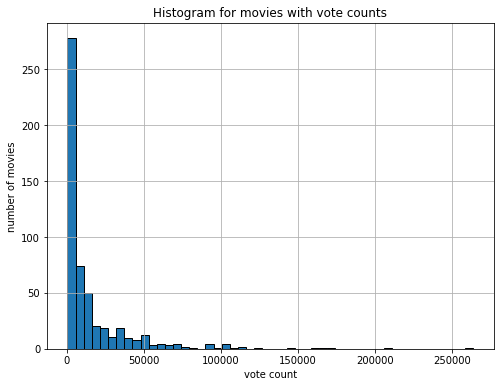

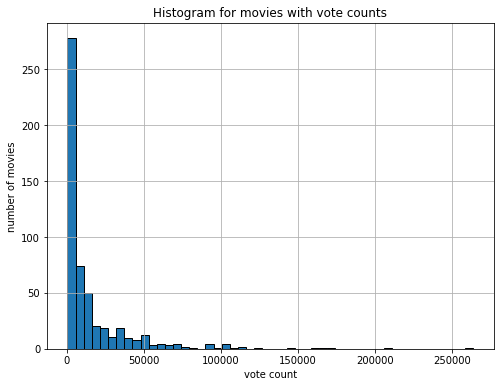

In [148]:
p = plt.figure(figsize=(8,6))  
plt.xlabel('vote count')
plt.ylabel('number of movies')
plt.title('Histogram for movies with vote counts')
plt.rcParams['patch.force_edgecolor'] = True  
ratings_with_mean_count['vote_count'].hist(bins=50)  
pm.display('matplotlib_hist', p)

In the graph below we see that integer values tend to have taller bars as users are more likely to vote on whole numbers as opposed to decimal places. Interesting to note that the majority of vote averages lie between 3 and 4.

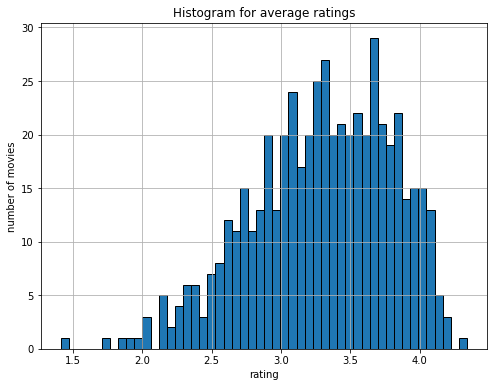

In [128]:
plt.figure(figsize=(8,6))  
plt.rcParams['patch.force_edgecolor'] = True 
plt.title('Histogram for average ratings')
plt.ylabel('number of movies')
plt.xlabel('rating')
ratings_with_mean_count['rating'].hist(bins=50)    

The graph below shows that movies with higher ratings generally have a higher vote count than those that have a lower rating tend to have a lower vote count

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



<Figure size 576x432 with 0 Axes>

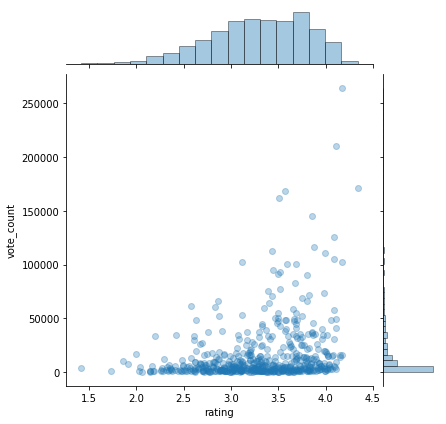

In [137]:
plt.figure(figsize=(8,6))  
plt.rcParams['patch.force_edgecolor'] = True  
sns.jointplot(x='rating', y='vote_count', data=ratings_with_mean_count, alpha=0.3)  

### Finding similarities in movies
To find similarities I'll use the correlation between the ratings of a movies as the similarity metric. To find the correlation I will create a matrix where each column is a movie name and each row is a user. The columns that have values in it will be the ones that the users will have rated. Most columns will have NaN values as every movie is not rated by every user.

In [130]:
user_movie_rating = movie_name_and_rating.pivot_table(index='userId', columns='title', values='rating')  

In [73]:
#example of the matrix
user_movie_rating.head(1)

title,10 Things I Hate About You,"10,000 BC",12 Angry Men,127 Hours,1408,16 Blocks,2 Fast 2 Furious,2001: A Space Odyssey,21 Grams,25th Hour,...,Willy Wonka & the Chocolate Factory,X-Men Origins: Wolverine,X-Men: Days of Future Past,You Only Live Twice,Young Frankenstein,Zathura: A Space Adventure,Zodiac,[REC],xXx,Æon Flux
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### I'm going to focus on 'The Shawshank Redemption'
I will find all the movies that users who rated 'The Shawshank Redemption' would also like based on their ratings.

In [74]:
#finds all the shawshank redemption ratings
the_shawshank_redemption_ratings = user_movie_rating['The Shawshank Redemption']

In [75]:
#finding the correlation between user ratings for 'The Shawshank Redemption' and all the other movies
movies_like_shawshank = user_movie_rating.corrwith(the_shawshank_redemption_ratings)
corr_shawshank = pd.DataFrame(movies_like_shawshank, columns=['correlation'])
corr_shawshank.dropna(inplace=True)
corr_shawshank.head(2)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2392: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2326: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,correlation
title,
10 Things I Hate About You,-0.146655
"10,000 BC",0.297715


In [76]:
#sorting to have all the high correlations at the top
corr_shawshank.sort_values('correlation', ascending=False).head(10) 

,correlation
title,
AVP: Alien vs. Predator,1.0
Carnage,1.0
The Shawshank Redemption,1.0
Apocalypto,1.0
Æon Flux,1.0
Gangs of New York,1.0
Bambi,1.0
Snow White and the Huntsman,1.0
Australia,1.0


In [48]:
#adding the vote count to each movie
corr_shawshank = corr_shawshank.join(ratings_with_mean_count['vote_count'])  
corr_shawshank.head(4)

,correlation,vote_count
title,,
10 Things I Hate About You,-0.146655,4254.0
"10,000 BC",0.297715,1772.0
12 Angry Men,0.411891,NaN
1408,0.465316,538.0


In [49]:
#looking at movies with a vote count greater than 10000
corr_shawshank[corr_shawshank['vote_count']>1000].sort_values('correlation', ascending=False).head(5)

,correlation,vote_count
title,,
The Shawshank Redemption,1.000000,2356.0
Repo Men,0.813218,1048.0
Captain America: The First Avenger,0.622622,1170.0
Kill Bill: Vol. 2,0.621948,7407.0
Shrek,0.613543,4335.0


In [51]:
user_movies_watched_ratings = user_movie_rating['Forrest Gump']

In [52]:
movies_like_movies_user_watched = user_movie_rating.corrwith(user_movies_watched_ratings)
corr_movies_user_watched = pd.DataFrame(movies_like_movies_user_watched, columns=['correlation'])
corr_movies_user_watched.dropna(inplace=True)
corr_movies_user_watched.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2392: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2326: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,correlation
title,
10 Things I Hate About You,0.413134
"10,000 BC",0.403046
12 Angry Men,0.420380
127 Hours,-0.644902
1408,0.379371
16 Blocks,0.567571
2 Fast 2 Furious,-0.240192
2001: A Space Odyssey,0.350690
21 Grams,0.544479


In [53]:
corr_movies_user_watched.sort_values('correlation', ascending=False).head(1)

,correlation
title,
The Wolf of Wall Street,1.0


In [54]:
corr_movies_user_watched = corr_movies_user_watched.join(ratings_with_mean_count['vote_count'])  
corr_movies_user_watched.head(1)

,correlation,vote_count
title,,
10 Things I Hate About You,0.413134,4254.0


In [55]:
corr_movies_user_watched[corr_movies_user_watched['vote_count']>200].sort_values('correlation', ascending=False).head(10)

,correlation,vote_count
title,,
Forrest Gump,1.000000,5514.0
Taxi,0.873543,2577.0
The Blues Brothers,0.764744,724.0
Pirates of the Caribbean: On Stranger Tides,0.758927,1278.0
The Princess Bride,0.757995,1385.0
Poseidon,0.746901,576.0
Spaceballs,0.744303,514.0
The Others,0.732618,892.0
Bruce Almighty,0.721772,530.0
